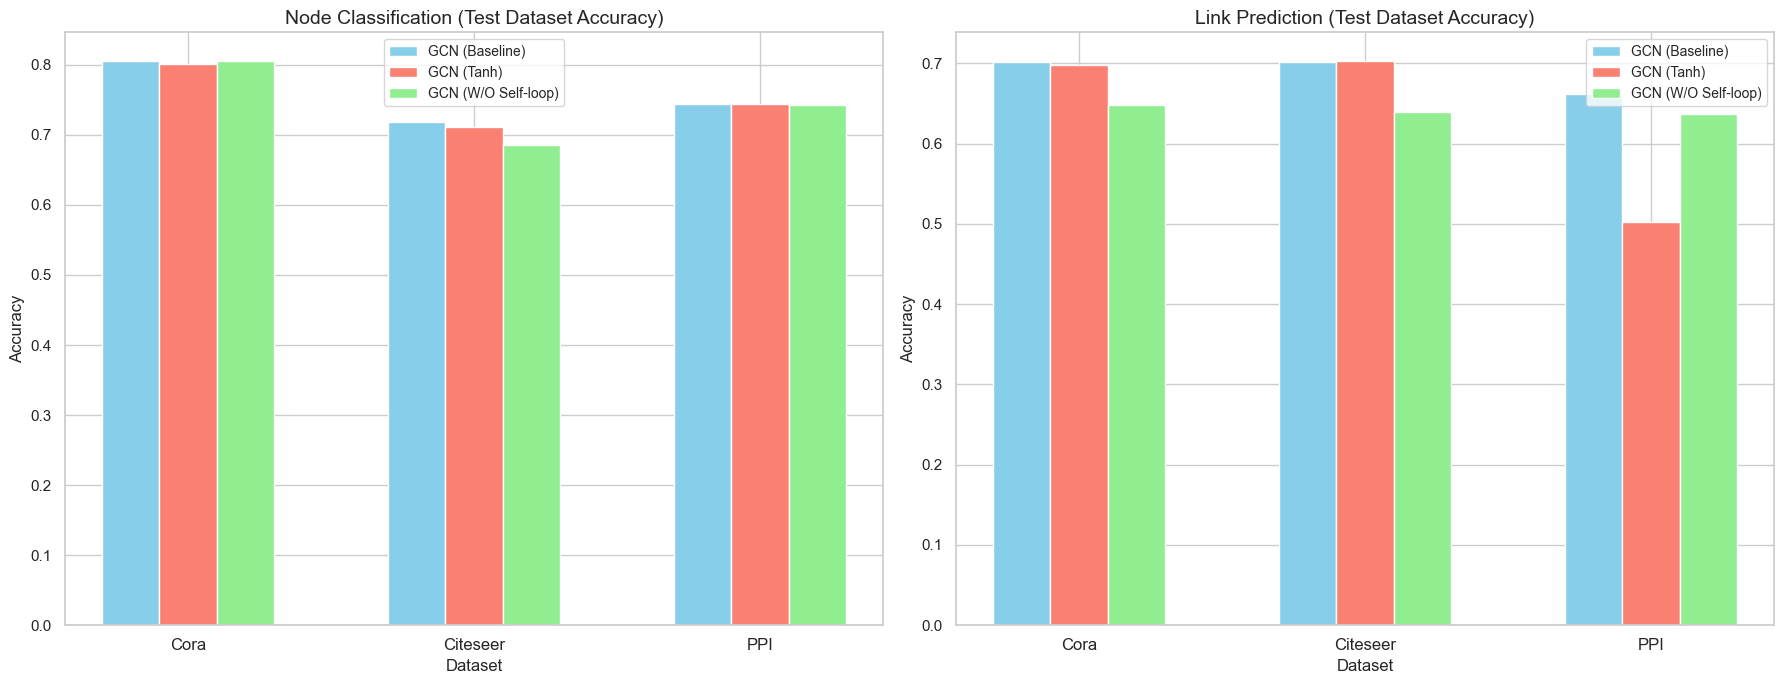

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define methods and datasets
methods = ['GCN (Baseline)', 'GCN (Tanh)', 'GCN (W/O Self-loop)']
datasets = ['Cora', 'Citeseer', 'PPI']

# Node Classification Accuracy Data
node_classification_accuracy = {
    'Cora': [0.806, 0.801, 0.806],
    'Citeseer': [0.718, 0.711, 0.686],
    'PPI': [0.7436, 0.7438, 0.7429]
}

# Link Prediction Accuracy Data
link_prediction_accuracy = {
    'Cora': [0.7021, 0.6973, 0.6480],
    'Citeseer': [0.7011, 0.7033, 0.6396],
    'PPI': [0.6615, 0.5028, 0.6364]
}

# Number of methods and datasets
n_methods = len(methods)
n_datasets = len(datasets)

# Set bar width
bar_width = 0.2
index = np.arange(n_datasets)

# Assign colors to different methods
colors = ['skyblue', 'salmon', 'lightgreen']

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot Node Classification Bar Chart
for i, method in enumerate(methods):
    accuracies = [node_classification_accuracy[dataset][i] for dataset in datasets]
    axes[0].bar(index + i * bar_width, accuracies, bar_width, label=method, color=colors[i])

axes[0].set_xlabel('Dataset', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Node Classification (Test Dataset Accuracy)', fontsize=14)
# Set x-axis tick positions and labels
axes[0].set_xticks(index + (n_methods - 1) * bar_width / 2)
axes[0].set_xticklabels(datasets, fontsize=12)
axes[0].legend(fontsize=10)

# Plot Link Prediction Bar Chart
for i, method in enumerate(methods):
    accuracies = [link_prediction_accuracy[dataset][i] for dataset in datasets]
    axes[1].bar(index + i * bar_width, accuracies, bar_width, label=method, color=colors[i])

axes[1].set_xlabel('Dataset', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Link Prediction (Test Dataset Accuracy)', fontsize=14)
# Set x-axis tick positions and labels
axes[1].set_xticks(index + (n_methods - 1) * bar_width / 2)
axes[1].set_xticklabels(datasets, fontsize=12)
axes[1].legend(fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


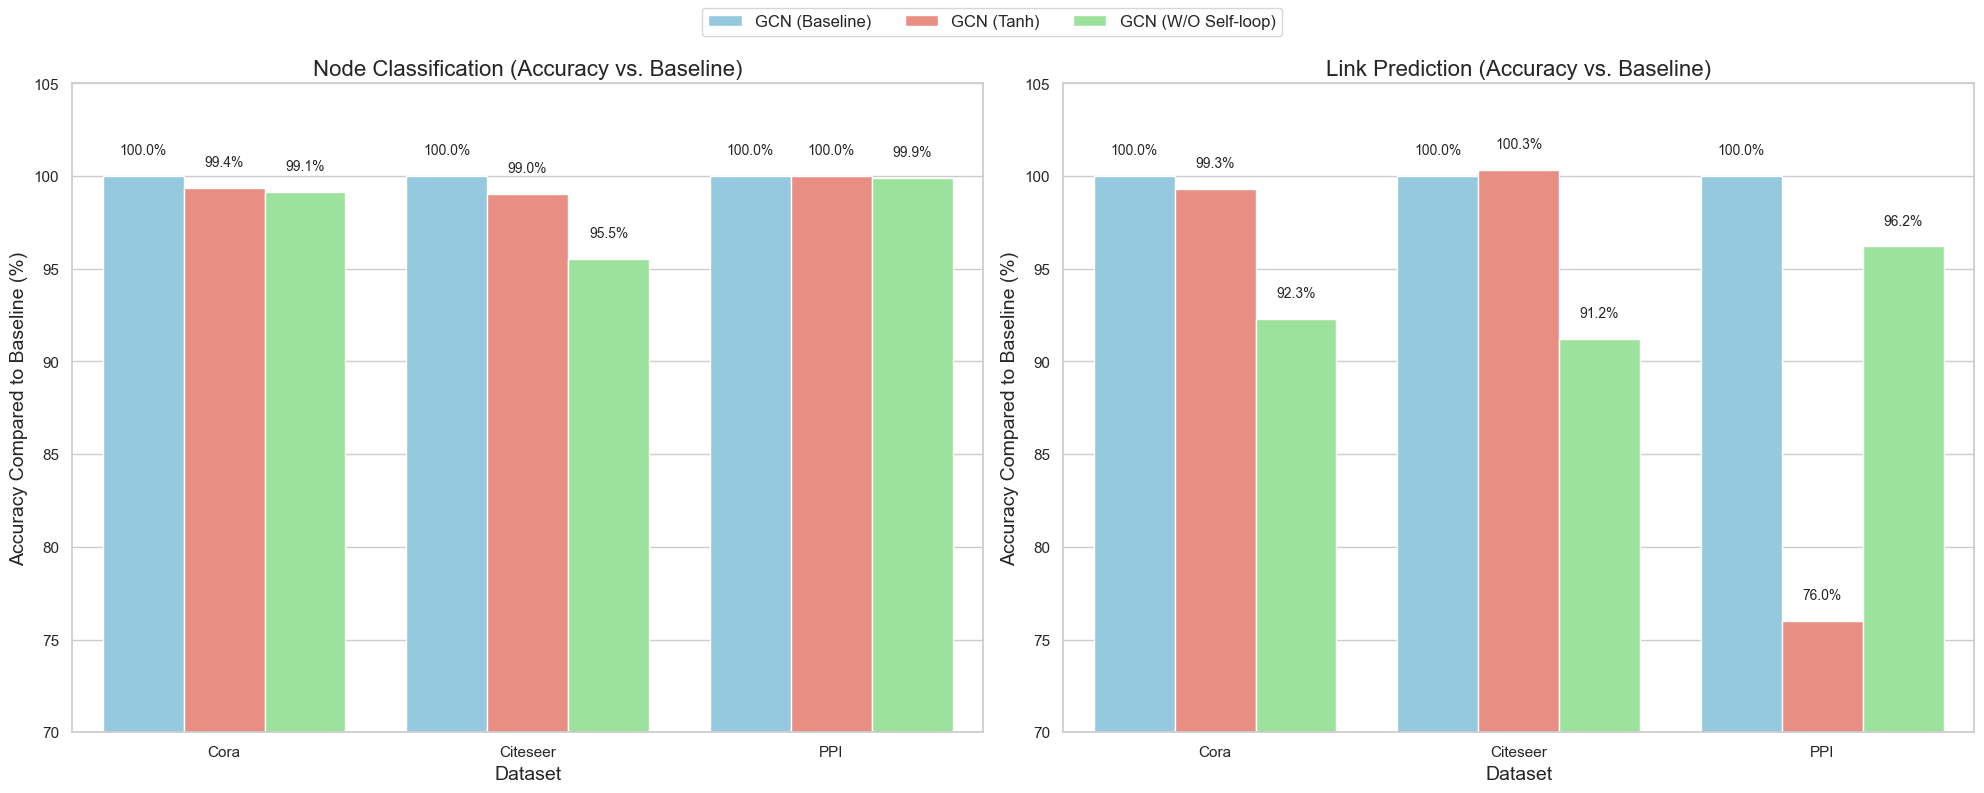

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define methods and datasets
methods = ['GCN (Baseline)', 'GCN (Tanh)', 'GCN (W/O Self-loop)']
datasets = ['Cora', 'Citeseer', 'PPI']
colors = ['skyblue', 'salmon', 'lightgreen']

# New Node Classification Accuracy Data
node_classification_accuracy = {
    'Cora': [0.806, 0.801, 0.799],
    'Citeseer': [0.718, 0.711, 0.686],
    'PPI': [0.7436, 0.7438, 0.7429]
}

# New Link Prediction Accuracy Data
link_prediction_accuracy = {
    'Cora': [0.7021, 0.6973, 0.6480],
    'Citeseer': [0.7011, 0.7033, 0.6396],
    'PPI': [0.6615, 0.5028, 0.6364]
}

# Function to calculate percentage compared to baseline and prepare DataFrame
def prepare_percentage_df(data):
    records = []
    for dataset in datasets:
        baseline = data[dataset][0]
        records.append({'Method': methods[0], 'Dataset': dataset, 'Percentage': 100.0})  # Baseline
        for i in range(1, len(methods)):
            percent = (data[dataset][i] / baseline) * 100
            records.append({'Method': methods[i], 'Dataset': dataset, 'Percentage': percent})
    df = pd.DataFrame(records)
    return df

# Prepare DataFrames
df_node = prepare_percentage_df(node_classification_accuracy)
df_link = prepare_percentage_df(link_prediction_accuracy)

# Set Seaborn style
sns.set(style="whitegrid")

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Function to plot with Seaborn
def plot_seaborn_bar(ax, df, title):
    sns.barplot(x='Dataset', y='Percentage', hue='Method', data=df, ax=ax, palette=colors)
    
    # Annotate bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height + 1), 
                    ha='center', va='bottom', fontsize=10)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Dataset', fontsize=14)
    ax.set_ylabel('Accuracy Compared to Baseline (%)', fontsize=14)
    ax.set_ylim(70, 104)  # Adjust y-axis limit to accommodate annotations

# Plot Node Classification Percentage Bar Chart
plot_seaborn_bar(axes[0], df_node, 'Node Classification (Accuracy vs. Baseline)')

# Plot Link Prediction Percentage Bar Chart
plot_seaborn_bar(axes[1], df_link, 'Link Prediction (Accuracy vs. Baseline)')

# Adjust legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=12)

# Remove individual legends from subplots
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Adjust layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
